## <font color='blue'>**Dataset**</font>:<font color='blue'> Superstore </font> sales data from  for the period 03/01/2014 - 30/12/2017 (Three years)

# <span style="background-color: yellow"> Data source and description</span>
- ### <font color='008ae6'>Dataset link:</font> (Tableau): https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls
- ### <font color='008ae6'>Row ID :</font> Contains the row number 
- ### <font color='008ae6'>Order ID :</font> Unique number associated with every order
- ### <font color='008ae6'>OrderDate :</font> The date when the order was placed.
- ### <font color='008ae6'>Ship Date :</font>Date when the order was shipped.
- ### <font color='008ae6'>Ship Mode :</font> Mode of shipping (same day, standard class, first class and second class) 
- ### <font color='008ae6'>Customer ID :</font> Unique number assigned to each customer 
- ### <font color='008ae6'>Customer Name :</font> Name of the customer
- ### <font color='008ae6'>Segment :</font> department of the product (consumer, corporate and home office)
- ### <font color='008ae6'>Country :</font> All the orders in the dataset are from the US. 
- ### <font color='008ae6'>City :</font> Name of the city from which the order was placed
- ### <font color='008ae6'>State :</font> Name of the state from which the order was placed
- ### <font color='008ae6'>Postal Code :</font> Postal address
- ### <font color='008ae6'>Region :</font> Central, East, South and West
- ### <font color='008ae6'>Product ID :</font> Unique number associated with each product
- ### <font color='008ae6'>Category :</font> Category of the product (Furniture, office supplies and technology)
- ### <font color='008ae6'>Sub-Category :</font> There are 17 sub categories in the dataset
- ### <font color='008ae6'>Product Name :</font> Name of the product
- ### <font color='008ae6'>Sales :</font> Price of the product
- ### <font color='008ae6'>Quantity :</font> Number of items 
- ### <font color='008ae6'>Discount :</font> Name of the product
- ### <font color='008ae6'>Profit :</font> Percentage of profit on the sale 
- ### <span style="background-color: yellow">Total Sales (Target Column) : Sales * Quantity</span>

# <font color='blue'>Step:</font> Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

# <font color='blue'>Step:</font> Importing dataset

In [ ]:
superstore = pd.read_csv("Superstore.csv", parse_dates =True, encoding='ISO-8859-1')
df=superstore.copy()
binders=superstore[superstore['Sub-Category']=='Binders']
paper=superstore[superstore['Sub-Category']=='Paper']
furnishings=superstore[superstore['Sub-Category']=='Furnishings']
df.head()

,Row ID,Order ID,OrderDate,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,TotalSales
0,7981,CA-2014-103800,1/3/2014,1/7/2014,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,32.896
1,740,CA-2014-112326,1/4/2014,1/8/2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,35.352
2,741,CA-2014-112326,1/4/2014,1/8/2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,818.208
3,742,CA-2014-112326,1/4/2014,1/8/2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,7.080
4,1760,CA-2014-141817,1/5/2014,1/12/2014,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,58.608


In [ ]:
df.shape

(9994, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   OrderDate      9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## <font color='blue'>Exploratory Data Analysis</font> (EDA)

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

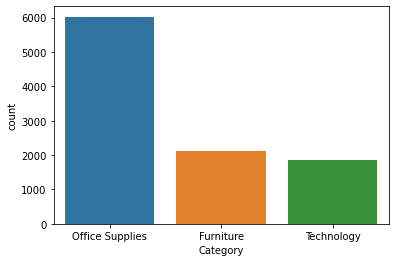

In [ ]:
sns.countplot(df['Category'])
df['Category'].value_counts()

Text(0.5, 1.0, 'Total number of orders for each sub-category')

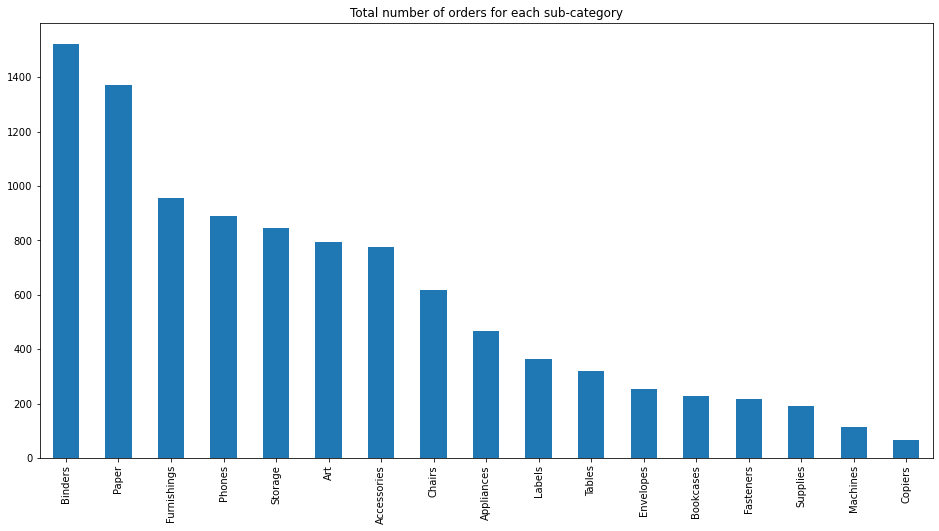

In [ ]:
df['Sub-Category'].value_counts().plot(kind='bar',figsize=(16,8));
plt.title("Total number of orders for each sub-category")

## <font color='blue'>Dropping unnecessary columns</font> except date and TotalSales (target column).

In [ ]:
# rename the colum to demand
df.drop(['Row ID', 'Order ID','Ship Date','Ship Mode','Customer ID', 'Sales' ,'Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit'], axis=1, inplace=True)
df

,OrderDate,TotalSales
0,1/3/2014,32.896
1,1/4/2014,35.352
2,1/4/2014,818.208
3,1/4/2014,7.080
4,1/5/2014,58.608
...,...,...
9989,12/30/2017,636.510
9990,12/30/2017,158.328
9991,12/30/2017,27.808
9992,12/30/2017,41.440


In [ ]:
df['OrderDate'] =  pd.to_datetime(df['OrderDate'])
df.set_index('OrderDate', inplace=True)
df

,TotalSales
OrderDate,
2014-01-03,32.896
2014-01-04,35.352
2014-01-04,818.208
2014-01-04,7.080
2014-01-05,58.608
...,...
2017-12-30,636.510
2017-12-30,158.328
2017-12-30,27.808


In [ ]:
df.isna().sum()

TotalSales    0
dtype: int64

## <font color='Blue'> Resampling</font> to monthly data 

In [ ]:
df=df.resample('M').mean()
df_copy=df.copy()
df_lstm=df.copy()
df

,TotalSales
OrderDate,
2014-01-31,933.469937
2014-02-28,426.156696
2014-03-31,1861.844287
2014-04-30,1084.614793
2014-05-31,963.447205
2014-06-30,1266.396033
2014-07-31,1107.640273
2014-08-31,898.367343
2014-09-30,1556.491499


In [ ]:
df.isna().sum()

TotalSales    0
dtype: int64

<AxesSubplot:xlabel='OrderDate'>

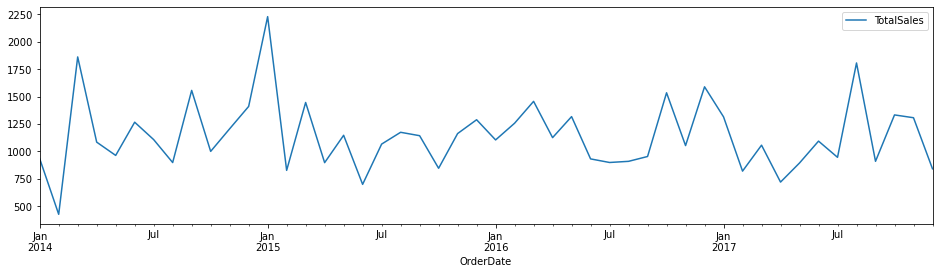

In [ ]:
# Plot the time series
df.plot(figsize=(16,4))

## <font color='Green'>Interpretation: </font> From the above plot, gives an <font color='Blue'>overview</font> of the total sales over the span of three years. We can see that there is a <font color='Blue'>trend</font> in the data.

In [ ]:
rmse=[]
mae=[]
mse=[]

# <font color='blue'>Method 1:</font> Moving Average

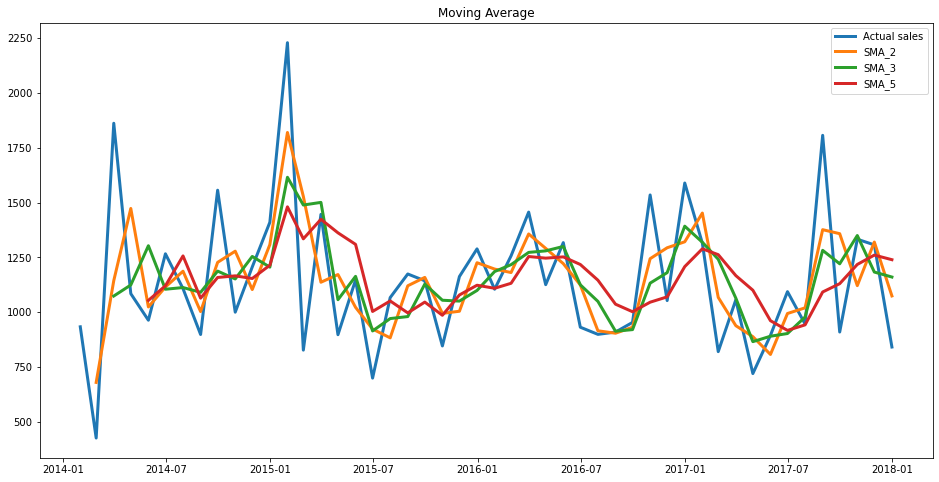

In [ ]:
dfma=df_copy.copy()
#SMA
dfma['SMA_2']=dfma.TotalSales.rolling(2).mean() # 2 month

dfma['SMA_3']=dfma.TotalSales.rolling(3).mean() # 3 month

dfma['SMA_5']=dfma.TotalSales.rolling(5).mean() # 5 month

# Plot
plt.figure(figsize=(16,8))
plt.title('Moving Average')
plt.plot(dfma['TotalSales'],linewidth=3, label='Actual sales')
plt.plot(dfma['SMA_2'], linewidth=3, label='SMA_2') 
plt.plot(dfma['SMA_3'], linewidth=3, label='SMA_3')
plt.plot(dfma['SMA_5'], linewidth=3, label='SMA_5') 
plt.legend()
plt.show()

## <font color='Green'>Interpretation: </font> From the above plot, we can see that <font color='Blue'>2-month moving average</font> is the closest to accurately depicting the trend of the actual data. 

In [ ]:
dfma['Error_2']=dfma['TotalSales']-dfma['SMA_2']
dfma['Error_3']=dfma['TotalSales']-dfma['SMA_3']
dfma['Error_5']=dfma['TotalSales']-dfma['SMA_5']

In [ ]:
# Calculate KPI
MAE_ma = dfma["Error_2"].abs().mean()  
print("MAE:",round(MAE_ma,2)) 
RMSE_ma = np.sqrt((dfma["Error_3"]**2).mean())
print("RMSE:",round(RMSE_ma,2))
MSE_ma = (dfma["Error_5"]**2).mean()
print("MSE:",round(MSE_ma,2))


mae.append(MAE_ma)
mse.append(MSE_ma)
rmse.append(RMSE_ma)

MAE: 192.94
RMSE: 259.72
MSE: 74966.94


In [ ]:
#Splitting data into train and test, last 12 weeks as the test
train=df[0:-12] 
test=df[-12:]

print(train.shape)
print(test.shape)

(36, 1)
(12, 1)


<AxesSubplot:xlabel='OrderDate'>

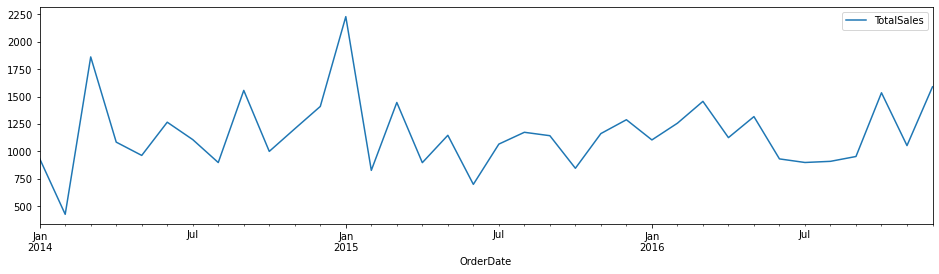

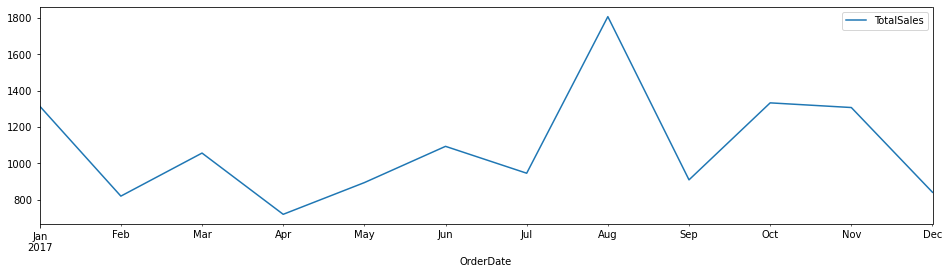

In [ ]:
# Plotting train and test data
train.plot(figsize=(16,4))
test.plot(figsize=(16,4))

## <font color='Green'>Interpretation: </font> The above plots are:
- ## Plot 1: Train data plot: The first plot is of training data. The training data contains the all the data except for the last 12 months.
- ## Plot 2: Test data plot: The second plot is of the testing data. Test data contains the last 12 months of the dataset

# <font color='blue'>Method 2:</font> Triple Exponential Smoothing

MAE 483.87
MSE 294,153.90
RMSE 542.36


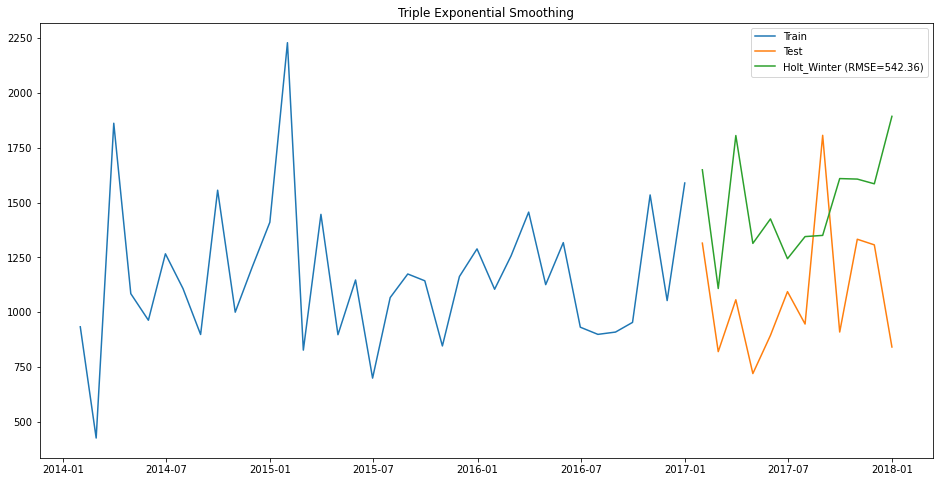

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Fit the model
pred = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['TotalSales']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit(smoothing_level = 0.3,smoothing_slope = 0.4)

pred['Holt_Winter'] = fit1.forecast(len(test))
# Calculate KPI's
mae_tes = mean_absolute_error(test.TotalSales, pred.Holt_Winter)
mse_tes=mean_squared_error(test.TotalSales, pred.Holt_Winter)
rmse_tes = sqrt(mean_squared_error(test.TotalSales, pred.Holt_Winter))
print("MAE {:,.2f}".format(mae_tes))
print("MSE {:,.2f}".format(mse_tes))
print("RMSE {:,.2f}".format(rmse_tes))

mae.append(mae_tes)
mse.append(mse_tes)
rmse.append(rmse_tes)

# Plot
plt.figure(figsize=(16,8))
plt.plot( train['TotalSales'], label='Train')
plt.plot(test['TotalSales'], label='Test')
plt.plot(pred['Holt_Winter'], label='Holt_Winter (RMSE={:.2f})'.format(rmse_tes))
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()

## <font color='green'>Interpretation:</font> We used <font color='blue'>Triple Exponential Smoothing</font> because our dataset has both trend and seasonality. From the above plot we can see that the test data is slightly different than the forecast for the same period. <font color='blue'>This could be because the forecast is based on the trend and seasonality of the previous years</font>, but sales must have decreased because of several different factors. Following are the predicted values:

In [ ]:
pred

,TotalSales,Holt_Winter
OrderDate,,
2017-01-31,1315.049174,1649.507822
2017-02-28,820.214807,1108.110762
2017-03-31,1056.826418,1805.772579
2017-04-30,720.176975,1313.923244
2017-05-31,894.461822,1425.575898
2017-06-30,1093.821127,1244.060279
2017-07-31,946.062133,1344.951554
2017-08-31,1806.769385,1350.361340
2017-09-30,909.629316,1609.490702


# Seasonal decompose

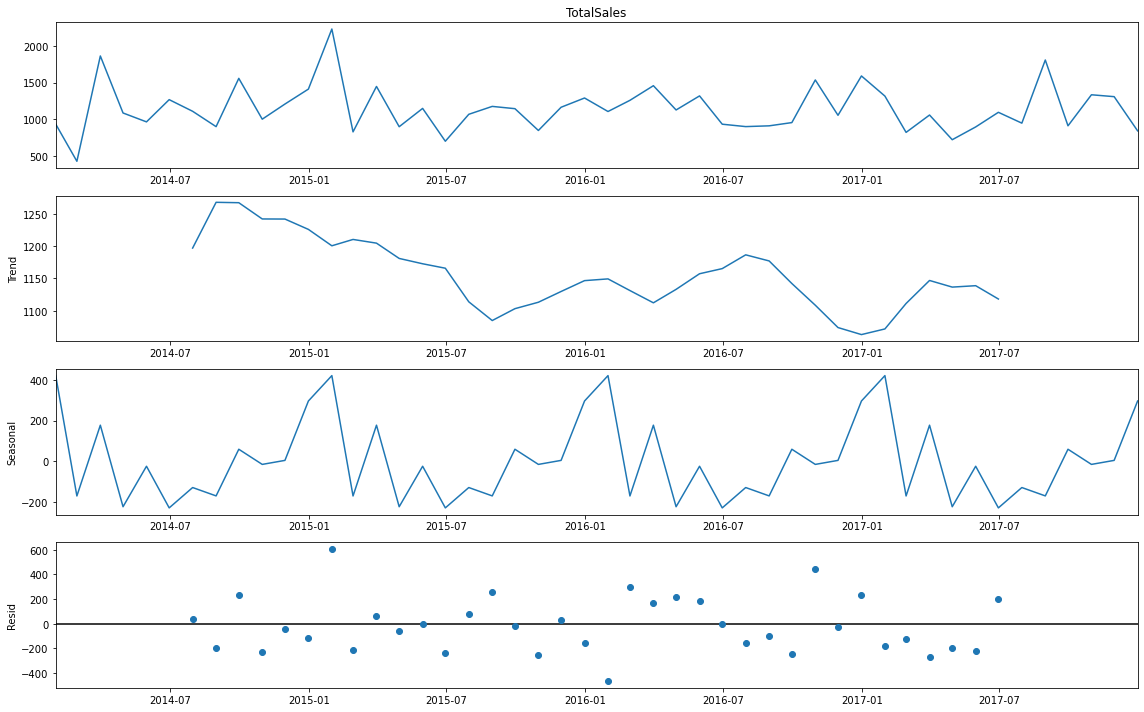

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 10

# Decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df['TotalSales'])

decomp.plot()
plt.show()

## <font color='green'>Interpretation:</font> From the above seasonal decomposition plot, we can see that there is a <font color='blue'> trend and seasonality </font> in the data. 

#### Check for Stationarity

In [ ]:
# Perform Dickey Fuller Test 
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['TotalSales'])
print(result)

(-2.553776767797281, 0.10293185693190288, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, 533.3466559324442)


## <font color='green'>Interpretation:</font>  From the above result, we can see that the <font color='blue'>test statistic value is -2.5537 is not less than -2.9435 (5%) and p value is 0.1029,</font> which is not less than the threshold value, because of which the dataset <font color='blue'>does not meet the criteria for a stationary dataset</font>.

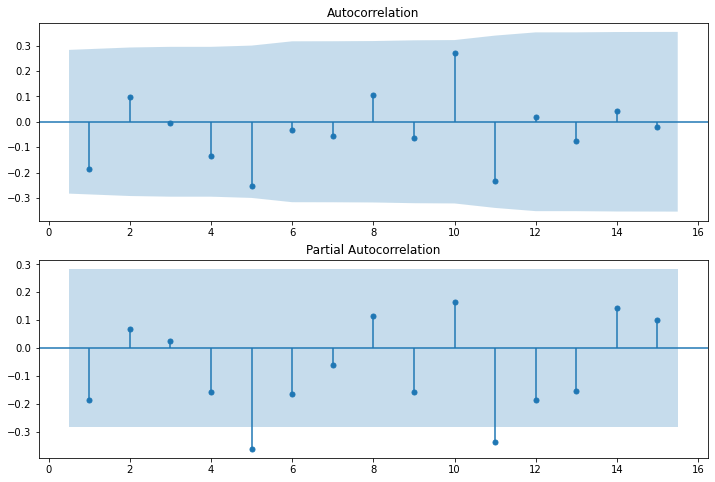

In [ ]:
# Import ACF and PCF functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(df, lags=15, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df, lags=15, zero=False, ax=ax2)

plt.show()

# Making the dataset <font color='Blue'>stationary</font> 

In [ ]:
# Make it stationary Take the first difference of the data
df_diff = df.diff().dropna()

# Run Dicky-Fuller test
result = adfuller(df_diff['TotalSales'])

# Print test statistic
print(result)

(-4.205839073273217, 0.0006440637639163264, 8, 38, {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}, 521.7302759676816)


## <font color='green'>Interpretation:</font>  From the above result, we can see that the p value is less than the threshold and -4.2058 is less than -2.9412 (5%), which means that the <font color='Blue'> dataset is now stationary</font>

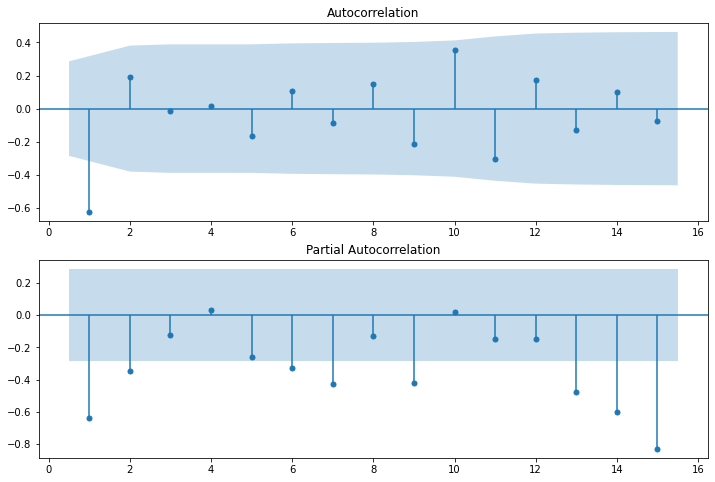

In [ ]:
# Import ACF and PCF functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(df_diff, lags=15, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df_diff, lags=15, zero=False, ax=ax2)

plt.show()

## <font color='blue'>Method 3:</font>  SARIMA

In [ ]:
import pmdarima as pm
# Import the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

#### Perform auto_arima with seasonality

In [ ]:
# Check for seasonal parameters
model_s = pm.auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model_s.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=362.305, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=355.600, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=359.783, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=0.50 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=356.382, Time=0.63 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=361.804, Time=0.06 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=352.867, Time=0.14 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=359.147, Time=0.08 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=0.24 sec

In [ ]:
# Build the model
model = SARIMAX(train, order=(2, 1, 0), seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False, dynamic =True)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         TotalSales   No. Observations:                   36
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 -64.344
Date:                            Mon, 12 Apr 2021   AIC                            136.688
Time:                                    00:48:16   BIC                            137.477
Sample:                                01-31-2014   HQIC                           134.985
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9896      0.502     -1.972      0.049      -1.973      -0.006
ar.L2         -0.5081      0.605     -0.839      0.401      -1.695       0.679
ar.S.L12      -0.7068      0.665     -1.062      0.288      -2.011       0.597
sigma2      9.492e+04   7.18e+04      1.321      0.186   -4.59e+04    2.36e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.75
Prob(Q):                              0.99   Prob(JB):                         0.42
Heteroskedasticity (H):              18.80   Skew:                             1.03
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Generate One Step Forecast with the plot for 12 previous entries

In [ ]:
# Generate predictions for the last 12 periods in sample
one_step_forecast = results.get_prediction(start=-12)

# Extract prediction mean
mean_forecast = pd.DataFrame(one_step_forecast.predicted_mean)

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower TotalSales']
upper_limits = confidence_intervals.loc[:,'upper TotalSales']

# Print best estimate predictions
mean_forecast

,predicted_mean
OrderDate,
2016-01-31,1652.619248
2016-02-29,546.266426
2016-03-31,1804.798684
2016-04-30,1264.265935
2016-05-31,1244.312087
2016-06-30,1005.472463
2016-07-31,1287.136326
2016-08-31,1048.620232
2016-09-30,1254.305445


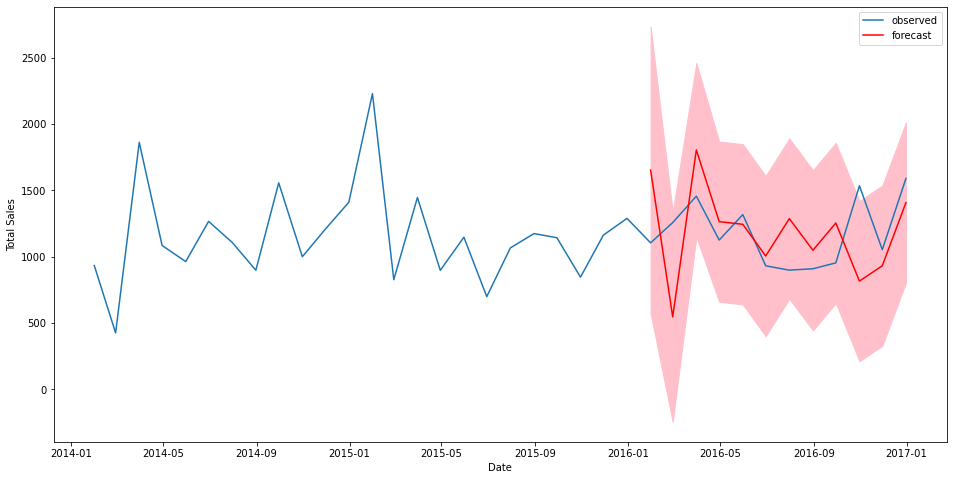

In [ ]:
# plot the  data
plt.figure(figsize=(16,8))
plt.plot(train.index, train, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

## <font color='green'>Interpretation:</font> From the above chart for one step forecast, we can see that, the forecast is showing that the sales are going to decrease and eventually increase.

#### Generate Dynamic Predictions with the plot for 12 previous entries

In [ ]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = pd.DataFrame(one_step_forecast.predicted_mean)

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower TotalSales']
upper_limits = confidence_intervals.loc[:,'upper TotalSales']

# Print best estimate predictions
mean_forecast

,predicted_mean
OrderDate,
2016-01-31,1652.619248
2016-02-29,878.510155
2016-03-31,2054.963526
2016-04-30,1366.594536
2016-05-31,1342.516950
2016-06-30,1425.773899
2016-07-31,1426.783760
2016-08-31,1304.774825
2016-09-30,1763.628966


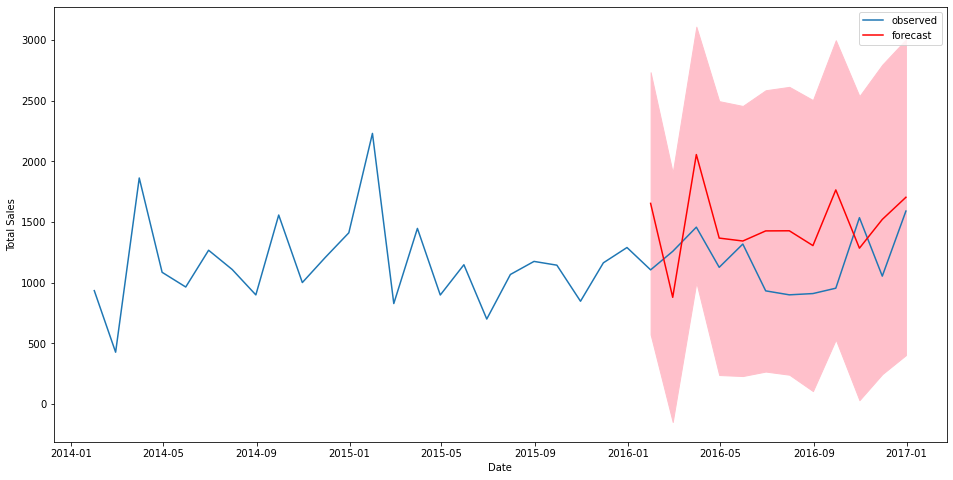

In [ ]:
# plot the  data
plt.figure(figsize=(16,8))
plt.plot(train.index, train, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

## <font color='green'>Interpretation:</font> From the above chart for dynamic predictions, we can see that, the forecast is showing that the sales will increase.

#### Out of the Sample Predictions with the plot for 12 steps

In [ ]:
forecast = results.get_forecast(steps =12)
mean_forecast= pd.DataFrame(forecast.predicted_mean)
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower TotalSales']
upper_limits = confidence_intervals.loc[:,'upper TotalSales']

# Print best estimate predictions
mean_forecast

,predicted_mean
2017-01-31,2128.797883
2017-02-28,987.504677
2017-03-31,1669.066383
2017-04-30,1099.659676
2017-05-31,1321.582577
2017-06-30,945.614265
2017-07-31,1148.103824
2017-08-31,1247.135086
2017-09-30,1242.628064
2017-10-31,1188.461659


MAE 374.57
MSE 197,252.77
RMSE 444.13


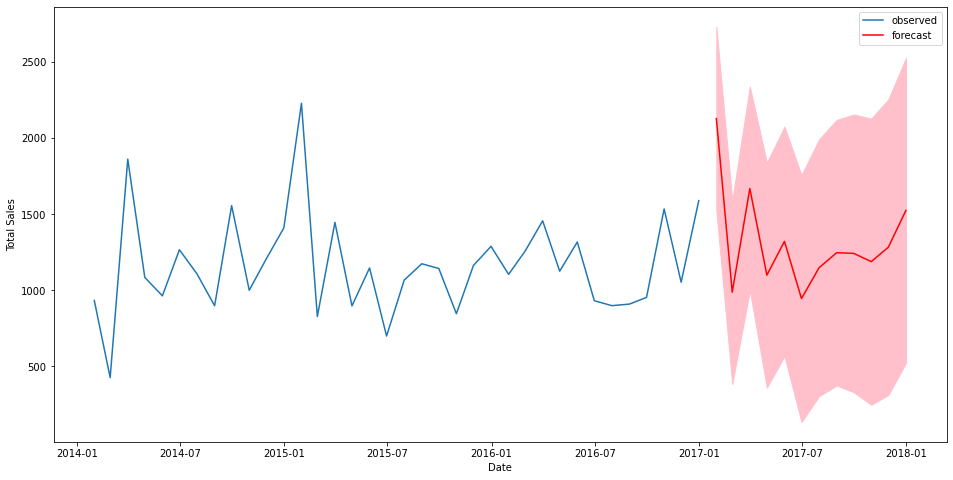

In [ ]:
# plot the  data
plt.figure(figsize=(16,8))
plt.plot(train.index, train, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

mae_sarima = mean_absolute_error(test.TotalSales, mean_forecast.predicted_mean)
mse_sarima =mean_squared_error(test.TotalSales,  mean_forecast.predicted_mean)
rmse_sarima = sqrt(mean_squared_error(test.TotalSales,  mean_forecast.predicted_mean))
print("MAE {:,.2f}".format(mae_sarima))
print("MSE {:,.2f}".format(mse_sarima))
print("RMSE {:,.2f}".format(rmse_sarima))

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

## <font color='green'>Interpretation:</font> From the above chart for out of sample predictions, we can see that, the forecast is similar to one step and dynamic precdictions, which is, the total sales will decrease and eventually increase.

## <font color='blue'>Method 4:</font> Machine Learning

In [ ]:
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV 

In [ ]:
superstore.head()
superstore=superstore.set_index('OrderDate')

In [ ]:
superstore.drop(['Row ID', 'Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category' ,'Product Name'], axis=1, inplace=True)

In [ ]:
superstore.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'TotalSales'], dtype='object')

In [ ]:
# Splitting the data
X = superstore.drop(["TotalSales"], axis = 1)
y = superstore["TotalSales"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.20, random_state=1)

In [ ]:
X.head()

,Sales,Quantity,Discount,Profit
OrderDate,,,,
1/3/2014,16.448,2,0.2,5.5512
1/4/2014,11.784,3,0.2,4.2717
1/4/2014,272.736,3,0.2,-64.7748
1/4/2014,3.540,2,0.8,-5.4870
1/5/2014,19.536,3,0.2,4.8840


In [ ]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor(n_jobs=-1,n_estimators=10)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

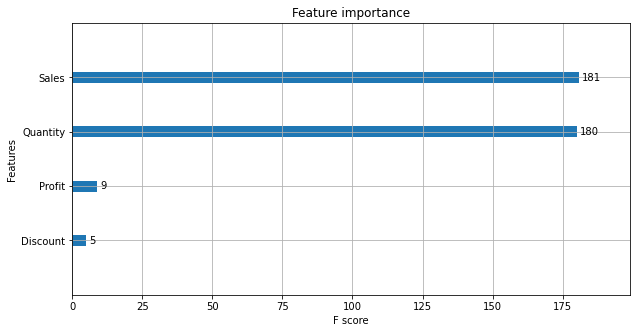

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot
pyplot.rcParams["figure.figsize"] = (10,5)
plot_importance(xgb)
pyplot.show()

In [ ]:
y_pred = pd.DataFrame(xgb.predict(X_test),columns=['Predicted_sales'])
y_pred.head()

,Predicted_sales
0,19.302349
1,1417.024170
2,876.497131
3,692.488098
4,93.524094


In [ ]:
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = sqrt(mean_squared_error(y_test, y_pred))
print("Mean Squared Error for XGBoost:", mse_xgb)
print("Root Mean Squared Error for XGBoost:", rmse_xgb)

Mean Squared Error for XGBoost: 4899713.575800656
Root Mean Squared Error for XGBoost: 2213.5296645404724


In [ ]:
print(xgb.score(X_test, y_test))

0.8069110403952837


## <font color='Green'>Interpretation:</font> From the above results,we can see that <font color='blue'>XGBoost has yielded 80% accuracy in prediction on test data</font> for our dataset.

# LSTM

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
df_lstm=df_lstm['TotalSales'].values

In [ ]:
df_lstm = df_lstm.reshape(-1,1)
df_lstm

array([[ 933.46993671],
       [ 426.15669565],
       [1861.84428662],
       [1084.61479259],
       [ 963.44720492],
       [1266.39603259],
       [1107.64027273],
       [ 898.36734314],
       [1556.49149851],
       [1000.15554088],
       [1206.42314371],
       [1410.25199101],
       [2229.27331724],
       [ 827.10529687],
       [1446.30177391],
       [ 897.46091562],
       [1146.96452397],
       [ 699.43686957],
       [1066.66947857],
       [1174.36817987],
       [1143.31528328],
       [ 846.13815361],
       [1162.69911636],
       [1288.87087215],
       [1104.74610112],
       [1257.16410843],
       [1456.56495092],
       [1125.69822941],
       [1317.40879111],
       [ 931.65483417],
       [ 898.94379602],
       [ 909.43469375],
       [ 953.5649876 ],
       [1534.82785204],
       [1053.09872595],
       [1589.26184375],
       [1315.04917419],
       [ 820.21480748],
       [1056.82641849],
       [ 720.17697488],
       [ 894.46182231],
       [1093.821

In [ ]:
df_lstm.dtype

dtype('float64')

In [ ]:
# Coverting to float as Neural networks work best with floats if it is already not there
df_lstm = df_lstm.astype('float32')
df_lstm.shape

(48, 1)

In [ ]:
# Scaling the data
scalar =MinMaxScaler()
df_lstm=scalar.fit_transform(df_lstm)

In [ ]:
# Split into train and test
train = df_lstm[:-12,:]
test = df_lstm[-12:,:]


In [ ]:
print(len(train), len(test))

36 12


In [ ]:
# Building the 2D array for supervised learning
def create_data(sequence, time_stemp):
    dataX = []
    dataY = []
    for i in range(len(sequence)-time_stemp-1):
        a = sequence[i:(i+time_stemp), 0]
        dataX.append(a)
        dataY.append(sequence[i + time_stemp, 0])
    return np.array(dataX),  np.array(dataY)

In [ ]:
time_stemp = 1

In [ ]:
# Apply the 2D array function to train and test datasets
train_X, train_Y = create_data(train,time_stemp)
test_X, test_Y =create_data(test, time_stemp)

In [ ]:
# transform input from [samples, features] to [samples, timesteps, features] basically from 2D to 3D
train_X = np.reshape(train_X, (train_X.shape[0],1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))


# <font color='blue'>Epochs:</font> 50

In [ ]:
# Build the LSTM Model
model = Sequential()
# Adding the input layer and LSTM layer
model.add(LSTM(50, activation= 'relu', input_shape =(1, time_stemp)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer ='adam', loss='mse')
model.fit(train_X, train_Y, batch_size=4, epochs =50, verbose=2)

Epoch 1/50
9/9 - 2s - loss: 0.1901
Epoch 2/50
9/9 - 0s - loss: 0.1691
Epoch 3/50
9/9 - 0s - loss: 0.1510
Epoch 4/50
9/9 - 0s - loss: 0.1382
Epoch 5/50
9/9 - 0s - loss: 0.1233
Epoch 6/50
9/9 - 0s - loss: 0.1108
Epoch 7/50
9/9 - 0s - loss: 0.0980
Epoch 8/50
9/9 - 0s - loss: 0.0882
Epoch 9/50
9/9 - 0s - loss: 0.0787
Epoch 10/50
9/9 - 0s - loss: 0.0686
Epoch 11/50
9/9 - 0s - loss: 0.0597
Epoch 12/50
9/9 - 0s - loss: 0.0545
Epoch 13/50
9/9 - 0s - loss: 0.0510
Epoch 14/50
9/9 - 0s - loss: 0.0457
Epoch 15/50
9/9 - 0s - loss: 0.0480
Epoch 16/50
9/9 - 0s - loss: 0.0419
Epoch 17/50
9/9 - 0s - loss: 0.0402
Epoch 18/50
9/9 - 0s - loss: 0.0426
Epoch 19/50
9/9 - 0s - loss: 0.0383
Epoch 20/50
9/9 - 0s - loss: 0.0425
Epoch 21/50
9/9 - 0s - loss: 0.0395
Epoch 22/50
9/9 - 0s - loss: 0.0403
Epoch 23/50
9/9 - 0s - loss: 0.0402
Epoch 24/50
9/9 - 0s - loss: 0.0385
Epoch 25/50
9/9 - 0s - loss: 0.0393
Epoch 26/50
9/9 - 0s - loss: 0.0374
Epoch 27/50
9/9 - 0s - loss: 0.0401
Epoch 28/50
9/9 - 0s - loss: 0.0440
E

In [ ]:
# Make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)
# inverting predictions
train_predict = scalar.inverse_transform(train_predict)
train_Y50 = scalar.inverse_transform([train_Y])
test_predict = scalar.inverse_transform(test_predict)
test_Y50 = scalar.inverse_transform([test_Y])
# calculate root mean squared error
train_score = math.sqrt(mean_squared_error(train_Y50[0], train_predict[:,0]))
print('Train Score: %.3f RMSE' % (train_score))
test_score = math.sqrt(mean_squared_error(test_Y50[0], test_predict[:,0]))
print('Test Score: %.3f RMSE' % (test_score))

Train Score: 342.160 RMSE
Test Score: 314.306 RMSE


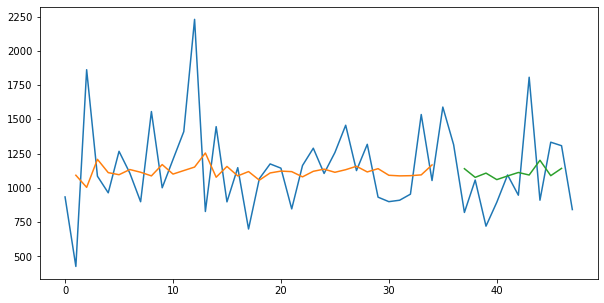

In [ ]:
# shifting train
train_plot = np.empty_like(df_lstm) # create an array with the same shape as provided
train_plot[:, :] = np.nan
train_plot[time_stemp:len(train_predict)+time_stemp, :] = train_predict
# shifting test predictions for plotting
test_plot = np.empty_like(df_lstm)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_stemp*2)+1:len(df_lstm)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df_lstm))
plt.plot(train_plot)
plt.plot(test_plot)
plt.show()

# <font color='Blue'>KPI comparison</font> of all methods

In [ ]:
MSE_ma=round(MSE_ma,2)
print("MSE MA",MSE_ma)
mse_xgb=round(mse_xgb,2)
print("MSE XGBoost",mse_xgb)
mse_tes=round(mse_tes,2)
print("MSE TES",mse_tes)
mse_sarima=round(mse_sarima,2)

MSE MA 74966.94
MSE XGBoost 4899713.58
MSE TES 294153.9


In [ ]:
models = ('TES','MA','SARIMAX','XGBoost')
MSE = [mse_tes, MSE_ma,mse_sarima,mse_xgb]
KPI_comparison = pd.DataFrame({'MSE': MSE}, index = models)

In [ ]:
KPI_comparison

,MSE
TES,294153.90
MA,74966.94
SARIMAX,197252.77
XGBoost,4899713.58


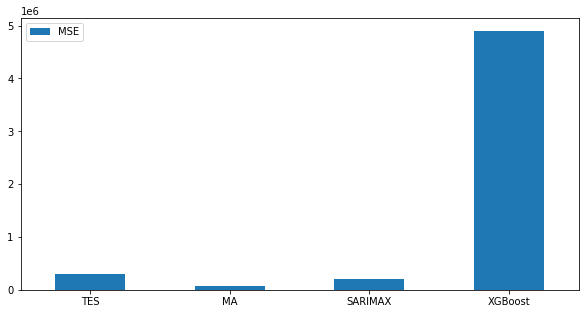

In [ ]:
plot=KPI_comparison.plot.bar(rot=0)

In [ ]:
def highlight_min(KPI_comparison):
    is_min = kpi_data == KPI_comparison.min()
    return ['background-color: lightgreen' if v else '' for v in is_min]

In [ ]:
KPI_comparison.style.highlight_min(color='lightgreen')

,MSE
TES,294153.900000
MA,74966.940000
SARIMAX,197252.770000
XGBoost,4899713.580000


## <font color='blue'> Out of sample sales forecast of top 3 products</font> with high number of orders:
- ### Binders
- ### Papers
- ### Furnishings

# <font color='blue'>Binders:</font> Out of sample <font color='blue'>sales forecast of binders</font> using SARIMAX

In [ ]:
binders.drop(['Row ID', 'Order ID','Ship Date','Ship Mode','Customer ID', 'Sales' ,'Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit'], axis=1, inplace=True)
binders['OrderDate']= pd.to_datetime(binders['OrderDate'])
binders.set_index('OrderDate', inplace=True)
binders=binders.resample('M').mean()
binders.head()

,TotalSales
OrderDate,
2014-01-31,168.387833
2014-02-28,70.979231
2014-03-31,214.482136
2014-04-30,405.521111
2014-05-31,1565.326000


In [ ]:
#Splitting data into train and test, last 12 weeks as the test
train_binders=binders[0:-12] 
test_binders=binders[-12:]

print(train_binders.shape)
print(test_binders.shape)

(36, 1)
(12, 1)


In [ ]:
# Check for seasonal parameters
model_b = pm.auto_arima(train_binders, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model_b.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=395.564, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=385.483, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=395.255, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=387.444, Time=0.25 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=387.370, Time=0.04 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=387.009, Time=0.16 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=386.832, Time=0.14 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=384.873, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=390.867, Time=0.06 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=386.184, T

In [ ]:
# Build the model
model_b = SARIMAX(train_binders, order=(0, 1, 1), seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False, dynamic =True)
results_b = model_b.fit()
results_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          TotalSales   No. Observations:                   36
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                 -89.881
Date:                             Mon, 12 Apr 2021   AIC                            185.763
Time:                                     00:48:30   BIC                            186.957
Sample:                                 01-31-2014   HQIC                           185.011
                                      - 12-31-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4533      1.679     -0.270      0.787      -3.743       2.837
ar.S.L12      -0.6454      0.253     -2.554      0.011      -1.141      -0.150
sigma2       7.28e+05   3.15e+05      2.311      0.021    1.11e+05    1.35e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                 4.18
Prob(Q):                              0.51   Prob(JB):                         0.12
Heteroskedasticity (H):               4.47   Skew:                             1.31
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Out of the Sample Predictions with the plot for 12 steps

In [ ]:
forecast_b = results_b.get_forecast(steps =12)
mean_forecast_b= pd.DataFrame(forecast_b.predicted_mean)
confidence_intervals_b= forecast_b.conf_int()
confidence_intervals_b
# Select lower and upper confidence limits
lower_limits_b = confidence_intervals_b.loc[:,'lower TotalSales']
upper_limits_b = confidence_intervals_b.loc[:,'upper TotalSales']

# Print best estimate predictions
mean_forecast_b

,predicted_mean
2017-01-31,1395.679479
2017-02-28,1667.561488
2017-03-31,3165.512294
2017-04-30,1789.900972
2017-05-31,1360.423017
2017-06-30,1665.878764
2017-07-31,1505.582396
2017-08-31,1493.335926
2017-09-30,1628.883746
2017-10-31,1518.701886


MAE 1,220.00
MSE 2,017,919.63
RMSE 1,420.53


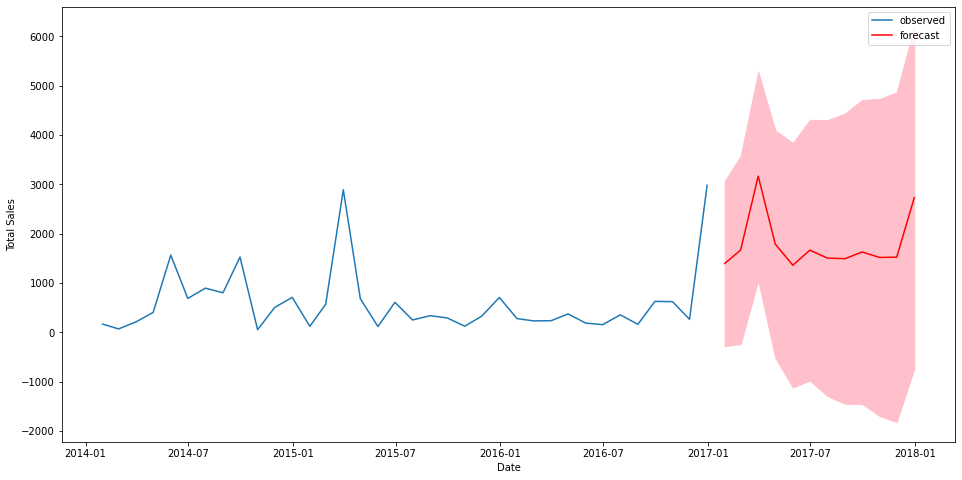

In [ ]:
# plot the  data
plt.figure(figsize=(16,8))
plt.plot(train_binders.index, train_binders, label='observed')

# plot your mean predictions
plt.plot(mean_forecast_b.index, mean_forecast_b, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits_b.index, lower_limits_b, 
               upper_limits_b, color='pink')

mae_sarima_b = mean_absolute_error(test_binders.TotalSales, mean_forecast_b.predicted_mean)
mse_sarima_b =mean_squared_error(test_binders.TotalSales,  mean_forecast_b.predicted_mean)
rmse_sarima_b = sqrt(mean_squared_error(test_binders.TotalSales,  mean_forecast_b.predicted_mean))
print("MAE {:,.2f}".format(mae_sarima_b))
print("MSE {:,.2f}".format(mse_sarima_b))
print("RMSE {:,.2f}".format(rmse_sarima_b))

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

## <font color='Green'>Interpretation:</font> From the above out of sample forecast for binders,we can see that the <font color='blue'> binder sales are going to increase, </font> which means that the inventory levels need to be monitored and restocked when necessary. 

# <font color='blue'>Paper :</font> Out of sample <font color='blue'>sales forecast of paper</font> using SARIMAX

In [ ]:
paper.drop(['Row ID', 'Order ID','Ship Date','Ship Mode','Customer ID', 'Sales' ,'Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit'], axis=1, inplace=True)
paper['OrderDate']= pd.to_datetime(paper['OrderDate'])
paper.set_index('OrderDate', inplace=True)
paper=paper.resample('M').mean()
paper.head()

,TotalSales
OrderDate,
2014-01-31,97.586800
2014-02-28,78.273333
2014-03-31,257.648609
2014-04-30,157.779529
2014-05-31,87.360667


In [ ]:
#Splitting data into train and test, last 12 weeks as the test
train_paper=paper[0:-12] 
test_paper=paper[-12:]

print(train_paper.shape)
print(test_paper.shape)

(36, 1)
(12, 1)


In [ ]:
# Check for seasonal parameters
model_p = pm.auto_arima(train_paper, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model_p.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=331.858, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=317.062, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=318.632, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=318.963, Time=0.24 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=318.986, Time=0.30 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=329.234, Time=0.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=315.634, Time=0.12 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=317.954, Time=0.04 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=0.21

In [ ]:
# Build the model
model_p = SARIMAX(train_paper, order=(0, 1, 2), seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False, dynamic =True)
results_p = model_p.fit()
results_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          TotalSales   No. Observations:                   36
Model:             SARIMAX(0, 1, 2)x(1, 1, [], 12)   Log Likelihood                 -72.180
Date:                             Mon, 12 Apr 2021   AIC                            152.359
Time:                                     00:48:44   BIC                            153.951
Sample:                                 01-31-2014   HQIC                           151.356
                                      - 12-31-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.3538      0.464     -2.919      0.004      -2.263      -0.445
ma.L2          1.0000      0.573      1.746      0.081      -0.122       2.122
ar.S.L12      -0.7391      0.465     -1.589      0.112      -1.651       0.173
sigma2      2.044e+04   3.78e-05   5.41e+08      0.000    2.04e+04    2.04e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 1.54
Prob(Q):                              0.61   Prob(JB):                         0.46
Heteroskedasticity (H):               0.11   Skew:                             0.91
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.12e+24. Standard errors may be unstable.
"""

#### Out of the Sample Predictions with the plot for 12 steps

In [ ]:
forecast_p = results_p.get_forecast(steps =12)
mean_forecast_p= pd.DataFrame(forecast_p.predicted_mean)
confidence_intervals_p= forecast_p.conf_int()
confidence_intervals_p
# Select lower and upper confidence limits
lower_limits_p = confidence_intervals_p.loc[:,'lower TotalSales']
upper_limits_p = confidence_intervals_p.loc[:,'upper TotalSales']

# Print best estimate predictions
mean_forecast_p

,predicted_mean
2017-01-31,68.797955
2017-02-28,149.876495
2017-03-31,333.369682
2017-04-30,36.523094
2017-05-31,211.975490
2017-06-30,119.403585
2017-07-31,26.784501
2017-08-31,193.628085
2017-09-30,236.127569
2017-10-31,93.751362


MAE 130.53
MSE 20,238.58
RMSE 142.26


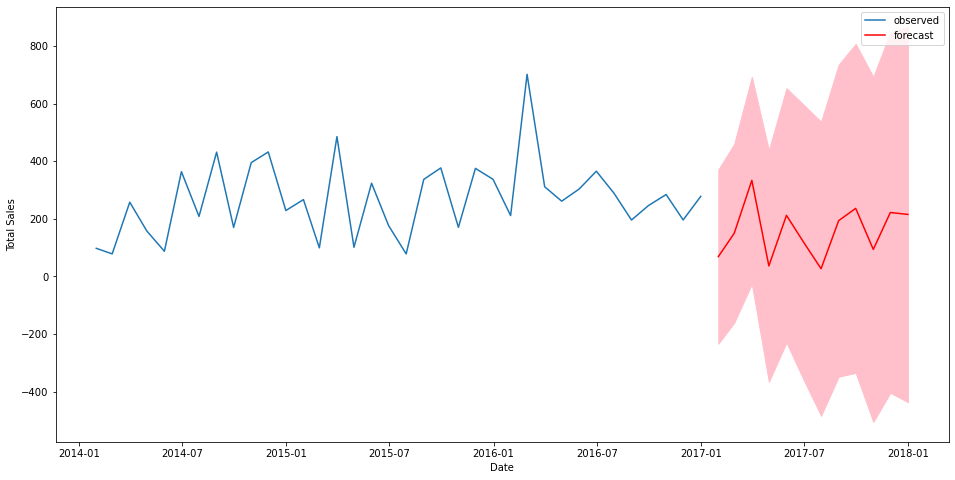

In [ ]:
# plot the  data
plt.figure(figsize=(16,8))
plt.plot(train_paper.index, train_paper, label='observed')

# plot your mean predictions
plt.plot(mean_forecast_p.index, mean_forecast_p, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits_p.index, lower_limits_p, 
               upper_limits_p, color='pink')

mae_sarima_p = mean_absolute_error(test_paper.TotalSales, mean_forecast_p.predicted_mean)
mse_sarima_p =mean_squared_error(test_paper.TotalSales,  mean_forecast_p.predicted_mean)
rmse_sarima_p = sqrt(mean_squared_error(test_paper.TotalSales,  mean_forecast_p.predicted_mean))
print("MAE {:,.2f}".format(mae_sarima_p))
print("MSE {:,.2f}".format(mse_sarima_p))
print("RMSE {:,.2f}".format(rmse_sarima_p))

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

## <font color='Green'>Interpretation:</font> From the above out of sample forecast for paper,we can see that the <font color='blue'> paper sales are going to decrease, </font> which means that it is important to strategize, to either give discounts on paper or develop new marketing campaigns to boost sales. 

# <font color='blue'>Furnishings :</font> Out of sample <font color='blue'>sales forecast of furnishings</font> using SARIMAX

In [ ]:
furnishings.drop(['Row ID', 'Order ID','Ship Date','Ship Mode','Customer ID', 'Sales' ,'Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Discount','Profit'], axis=1, inplace=True)
furnishings['OrderDate']= pd.to_datetime(furnishings['OrderDate'])
furnishings.set_index('OrderDate', inplace=True)
furnishings=furnishings.resample('M').mean()
furnishings.head()

,TotalSales
OrderDate,
2014-01-31,220.191091
2014-02-28,308.755000
2014-03-31,146.543200
2014-04-30,332.190364
2014-05-31,309.585556


In [ ]:
#Splitting data into train and test, last 12 weeks as the test
train_furnishings=furnishings[0:-12] 
test_furnishings=furnishings[-12:]

print(train_furnishings.shape)
print(test_furnishings.shape)

(36, 1)
(12, 1)


In [ ]:
# Check for seasonal parameters
model_f = pm.auto_arima(train_furnishings, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model_f.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=367.015, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=354.938, Time=0.26 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.73 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(1,1,1

In [ ]:
# Build the model
model_f = SARIMAX(train_furnishings, order=(0, 1, 0), seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False, dynamic =True)
results_f = model_f.fit()
results_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           TotalSales   No. Observations:                   36
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                 -73.170
Date:                              Mon, 12 Apr 2021   AIC                            152.340
Time:                                      00:48:49   BIC                            153.248
Sample:                                  01-31-2014   HQIC                           151.344
                                       - 12-31-2016                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6663      0.522     -1.278      0.201      -1.689       0.356
ma.S.L12      -0.9926      0.667     -1.489      0.137      -2.299       0.314
sigma2      7.485e+04   8.96e-06   8.35e+09      0.000    7.49e+04    7.49e+04
===================================================================================
Ljung-Box (L1) (Q):                   3.62   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.06   Prob(JB):                         0.80
Heteroskedasticity (H):               0.42   Skew:                            -0.41
Prob(H) (two-sided):                  0.50   Kurtosis:                         2.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.15e+25. Standard errors may be unstable.
"""

#### Out of the Sample Predictions with the plot for 12 steps

In [ ]:
forecast_f = results_f.get_forecast(steps =12)
mean_forecast_f= pd.DataFrame(forecast_f.predicted_mean)
confidence_intervals_f= forecast_f.conf_int()
confidence_intervals_f
# Select lower and upper confidence limits
lower_limits_f = confidence_intervals_f.loc[:,'lower TotalSales']
upper_limits_f = confidence_intervals_f.loc[:,'upper TotalSales']

# Print best estimate predictions
mean_forecast_f

,predicted_mean
2017-01-31,2155.418575
2017-02-28,1064.442962
2017-03-31,1289.333346
2017-04-30,1772.891672
2017-05-31,1185.894861
2017-06-30,1326.532281
2017-07-31,1312.522560
2017-08-31,1123.376542
2017-09-30,1061.605739
2017-10-31,1039.800052


MAE 881.07
MSE 873,247.21
RMSE 934.48


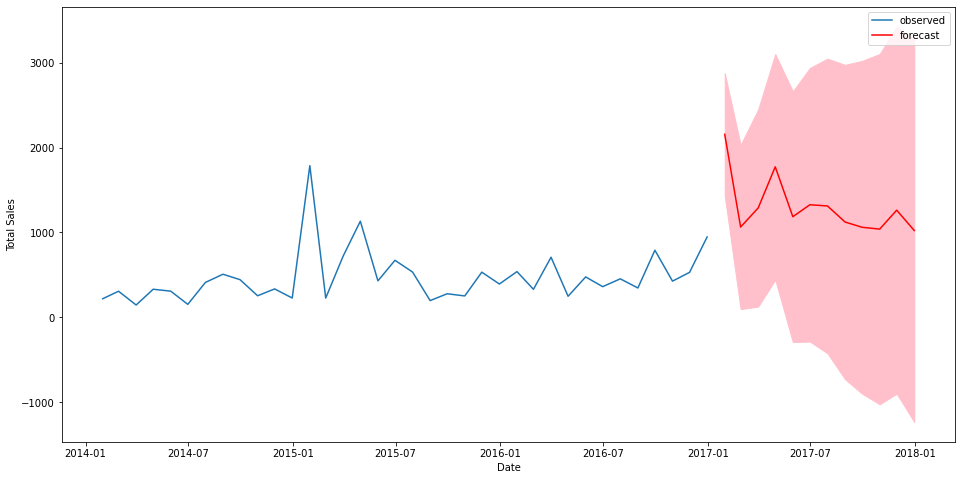

In [ ]:
# plot the  data
plt.figure(figsize=(16,8))
plt.plot(train_furnishings.index, train_furnishings, label='observed')

# plot your mean predictions
plt.plot(mean_forecast_f.index, mean_forecast_f, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits_f.index, lower_limits_f, 
               upper_limits_f, color='pink')

mae_sarima_f = mean_absolute_error(test_furnishings.TotalSales, mean_forecast_f.predicted_mean)
mse_sarima_f =mean_squared_error(test_furnishings.TotalSales,  mean_forecast_f.predicted_mean)
rmse_sarima_f = sqrt(mean_squared_error(test_furnishings.TotalSales,  mean_forecast_f.predicted_mean))
print("MAE {:,.2f}".format(mae_sarima_f))
print("MSE {:,.2f}".format(mse_sarima_f))
print("RMSE {:,.2f}".format(rmse_sarima_f))

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

## <font color='Green'>Interpretation:</font> From the above out of sample forecast for furnishings,we can see that the <font color='blue'> furnishings sales are going to increase and then decrease, </font> which means that it is important to strategize, to develop new marketing campaigns to boost sales and to restock accordingly. 

##  <font color='blue'>Summary</font>
-  <font color='blue'>**Dataset**</font>: I chose <font color='blue'>**Superstore sales data**</font> from Tableau for the period 03/01/2014 - 30/12/2017 (Three years)
- From decomposing the dataset, we understood that this <font color='blue'>**dataset has both trend and seasonality.**</font>
- I performed <font color='blue'>**moving average, triple exponential smoothing, XGBoost (Machine learning) and LSTM**</font>.
- <font color='blue'>**Goal:**</font> The main <font color='blue'>**goal**</font> of this project is to <font color='blue'>**analyze the superstore sales data to forecast the total sales**</font> using moving average, triple exponential smoothing, XGBoost (Machine learning) and LSTM.
- Overall, the most common observation from forecast charts of all the methods, is that the overall sales will evetually increase.
- On analyzing the forecast of the top three highest selling products, I observed the following things:
    - <font color="blue">**Binder sales are going to increase**, </font> which means that the inventory levels need to be monitored and restocked when necessary. 
    -  <font color='blue'> **Paper sales are going to decrease**, </font> which means that it is important to strategize, to either give discounts on paper or develop new marketing campaigns to boost sales. 
    - <font color='blue'> **Furnishings sales are going to increase and then decrease**, </font> which means that it is important to strategize, to develop new marketing campaigns to boost sales and to restock accordingly. 
- On comparing the MSE scores of all methods, we can conclude that  <font color='blue'>**MA has the lowest mean squared error**</font> making it the best method for this dataset.